https://rtavenar.github.io/blog/dtw.html
https://colab.research.google.com/github/DynamicTimeWarping/notebooks/blob/master/Python_DTW_Quickstart.ipynb
https://dynamictimewarping.github.io/python/
https://tslearn.readthedocs.io/en/stable/user_guide/clustering.html
https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html#tslearn.clustering.TimeSeriesKMeans
https://realpython.com/k-means-clustering-python/
noch anschauen:
https://www.kaggle.com/code/albertferre/timeserieskmeans-clustering


In [2]:
import numpy as np
from dtw import *
from scipy.io import arff
import pandas as pd


data = arff.loadarff('InsectSound_TRAIN.arff')
df = pd.DataFrame(data[0])
df.head()


data_test = arff.loadarff('InsectSound_TEST.arff')
df_test = pd.DataFrame(data_test[0])


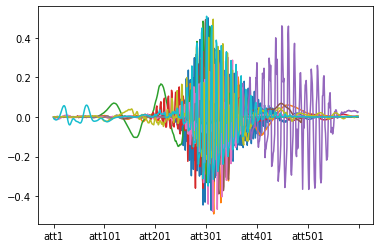

In [3]:
df2 = df.drop(['target'], axis=1)
for i in range (0, 5000, 500):
    row = df2.iloc[i]
    row.plot()
    
df2_test = df_test.drop(['target'], axis=1)

In [4]:
row1 = df2.iloc[3]
row2 = df2.iloc[7]
row3 = df2.iloc[10003]

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



c:\users\ich\appdata\local\programs\python\python37\lib\site-packages\dtw\stepPattern.py:341: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

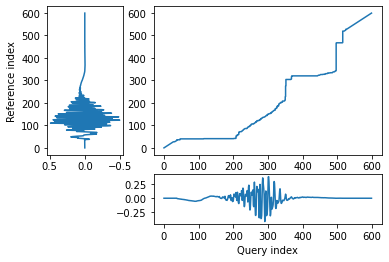

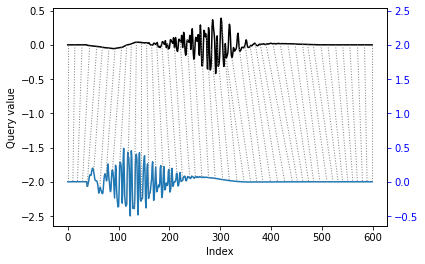

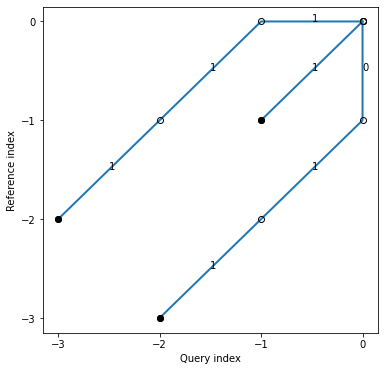

In [5]:
query = row1
template = row2

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()



Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



<AxesSubplot:xlabel='Query index', ylabel='Reference index'>

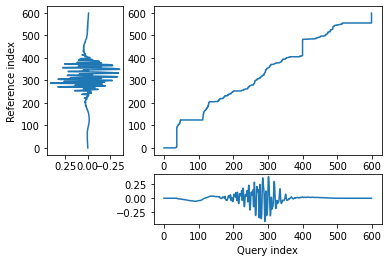

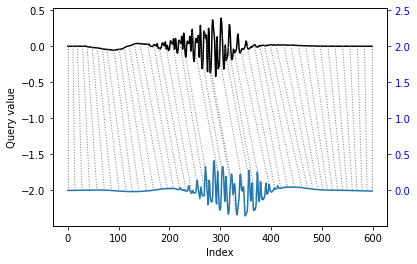

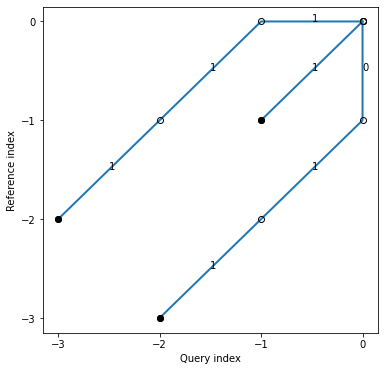

In [6]:
template = row3

alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

In [9]:
import tslearn
from tslearn.clustering import TimeSeriesKMeans

#km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0).fit(X)

km_dba = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, max_iter_barycenter=5, random_state=0).fit(df2)

KeyboardInterrupt: 

In [ ]:
true_labels = df2["target"]

ari_kmeans = adjusted_rand_score(true_labels, km_dba)